Pour le slide =>
Process de création du model:
- non-linearity ?
- normalisation !!!!
- encodage !

In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Data

In [3]:
# Import csv
# ! TODO Data à normaliser !!!!!!!!!!!
# df = pd.read_csv("./1_label_encoded.csv")
# df = pd.read_csv("./2_normalized_with_standard_scaler_with_extra_features.csv")
# df = pd.read_csv("./2bis_normalized_with_minmax")

# df = pd.read_csv("./3s_dataset_cleaned.csv")
df = pd.read_csv("./dataset_enhanced_with_drive.csv")


print(f"Nombre de classes:{len(df['label'].unique())}")

df 

Nombre de classes:10


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,...,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781,0
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,...,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425,0
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,...,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458,0
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,...,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744,0
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,...,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16429,3.667702,-4.875680,-1.153692,-0.719737,-1.716599,0.134080,-1.654220,1.739555,-1.499429,0.780060,...,-0.980495,1.785358,0.018480,-0.546433,-0.457361,1.366457,-1.219533,0.743225,-0.867149,4
16430,3.136811,-3.672270,-1.281875,-0.768764,-1.309017,0.228687,-1.195240,0.978636,-1.031411,0.562945,...,-0.781240,1.440615,0.745079,-0.779382,-0.898405,2.014491,-1.046684,1.079490,-0.598707,4
16431,2.955665,-2.859816,-1.274073,-0.750005,-1.461730,0.324683,-1.369703,1.828305,-1.211550,0.947378,...,-0.877557,1.734722,-0.021670,-0.899384,-0.418130,1.160808,-1.050210,0.536829,-0.852662,4
16432,3.647427,-4.686042,-1.090523,-0.741263,-1.228694,0.190233,-1.062095,1.629688,-0.925835,0.825360,...,-0.848432,1.864004,0.190600,-0.780483,-0.865345,1.849023,-1.078182,0.667600,-0.730702,4


In [4]:
# df to numpy

y = df['label'].to_numpy()
# x = df.drop(columns=['label', 'perceptr_mean', 'perceptr_var']).to_numpy() # ! Type issue ?
x = df.drop(columns=['label']).to_numpy() # ! Type issue ?


print("X shape =>",x.shape,"\ny shape =>", y.shape)
y[:3], x[:3]

X shape => (16434, 55) 
y shape => (16434,)


(array([0, 0, 0]),
 array([[-0.48780784,  0.64052047, -0.00662408,  0.2355679 , -0.56682811,
         -0.57279059, -0.4939833 , -0.00922924, -0.51859012, -0.36795231,
         -0.45406404, -0.5707769 ,  0.168385  , -0.33595446,  0.13100898,
          0.25172824, -0.14198751,  0.69496363, -0.71318496, -0.56103329,
         -0.03415077,  0.22904165, -0.01664507, -0.29237898,  0.08369783,
          0.37304378, -0.4233665 , -0.9219196 , -0.88928787,  0.63731806,
          0.2076171 , -0.75401836,  0.2040636 ,  0.22472928,  0.67357662,
         -0.40969216,  0.07104592,  0.6938639 , -0.33850305,  0.07076268,
         -0.64235701,  1.02775024, -0.15378764, -0.51579058, -0.265968  ,
         -0.75012151, -0.2991081 ,  0.16864712, -0.42513736, -0.00342281,
         -0.37693831, -0.49946359, -0.51356204,  0.12841417, -0.29178072],
        [-0.40314187,  0.13183473, -0.26494432, -0.34213353, -0.5087975 ,
         -0.74986207, -0.42538226, -0.51900967, -0.42411784, -0.64226819,
         -0.337472

In [5]:
# numpy to tensor

# x = torch.from_numpy(x).type(torch.float64)
# y = torch.from_numpy(y).type(torch.float64)
x = torch.from_numpy(x).type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

# x = torch.from_numpy(x)
# y = torch.from_numpy(y)

x[:3], y[:3]

(tensor([[-0.4878,  0.6405, -0.0066,  0.2356, -0.5668, -0.5728, -0.4940, -0.0092,
          -0.5186, -0.3680, -0.4541, -0.5708,  0.1684, -0.3360,  0.1310,  0.2517,
          -0.1420,  0.6950, -0.7132, -0.5610, -0.0342,  0.2290, -0.0166, -0.2924,
           0.0837,  0.3730, -0.4234, -0.9219, -0.8893,  0.6373,  0.2076, -0.7540,
           0.2041,  0.2247,  0.6736, -0.4097,  0.0710,  0.6939, -0.3385,  0.0708,
          -0.6424,  1.0278, -0.1538, -0.5158, -0.2660, -0.7501, -0.2991,  0.1686,
          -0.4251, -0.0034, -0.3769, -0.4995, -0.5136,  0.1284, -0.2918],
         [-0.4031,  0.1318, -0.2649, -0.3421, -0.5088, -0.7499, -0.4254, -0.5190,
          -0.4241, -0.6423, -0.3375, -0.4402,  0.1563, -0.6054, -0.0559,  0.1863,
          -0.2968,  0.6182, -0.8093, -0.4473, -0.4828,  0.7237, -0.3095, -0.6872,
          -0.0419,  0.4734, -0.3948, -0.9143, -0.0174,  0.7811, -0.3672, -0.5226,
          -0.1350,  1.0875, -0.3006, -0.6685, -0.2347,  0.4243, -0.4570, -0.3550,
          -0.7364,  1.02

In [6]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([13147, 55]),
 torch.Size([3287, 55]),
 torch.Size([13147]),
 torch.Size([3287]))

# 2. Model

In [7]:
# ! Model chatGPT => 'rangement' des layers interessants
# class MusicClassifier(nn.Module):
#     def __init__(self, input_size, hidden_sizes, output_size, dropout_prob):
#         super(MusicClassifier, self).__init__()
#         layers = []
        
#         # Input layer
#         layers.append(nn.Linear(input_size, hidden_sizes[0]))
#         layers.append(nn.ReLU())
        
#         # Hidden layers
#         for i in range(1, len(hidden_sizes)):
#             layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
#             layers.append(nn.ReLU())
#             layers.append(nn.BatchNorm1d(hidden_sizes[i]))
#             layers.append(nn.Dropout(p=dropout_prob))
        
#         # Output layer
#         layers.append(nn.Linear(hidden_sizes[-1], output_size))
#         layers.append(nn.LogSoftmax(dim=1))
        
#         self.model = nn.Sequential(*layers)
    
#     def forward(self, x):
#         return self.model(x)
# model_0 = MusicClassifier(input_size=23, output_size=10, hidden_sizes=[32,64,128], dropout_prob=0.7).to(device)

In [8]:
# # ! try different combination of deep, wide, dropout, other activation function than Relu 

# class MusicClassifier(nn.Module):
#     def __init__(self, input_features, output_features, hidden_unit):
#         """
#         Initializes all required hyperparameters for a multi-class classification model.

#         Args:
#             input_features (int): Number of input features to the model.
#             out_features (int): Number of output features of the model
#               (how many classes there are).
#             hidden_units (int): Number of hidden units between layers, default 8.
#         """
#         super().__init__()
#         # ! Try other than RELU
#         self.linear_layer_stack = nn.Sequential(
#             nn.Linear(in_features=input_features, out_features=hidden_unit, dtype=torch.float32),
#             nn.ReLU(),
#             nn.Dropout(p=0.2),
#             nn.Linear(in_features=hidden_unit, out_features=hidden_unit, dtype=torch.float32),
#             nn.ReLU(),
#             nn.Dropout(p=0.2),
#             nn.Linear(in_features=hidden_unit, out_features=output_features, dtype=torch.float32)
#         )
#     def forward(self, x):
#         return self.linear_layer_stack(x)

# torch.manual_seed(42)
# model_0 = MusicClassifier(input_features=56, output_features=10, hidden_unit=100).to(device)

# model_0

In [9]:
# ! try different combination of deep, wide, dropout, other activation function than Relu 

class MusicClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # ! Try other than RELU
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=2048, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),

            nn.Linear(in_features=2048, out_features=1024, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),

            nn.Linear(in_features=1024, out_features=512, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),

            nn.Linear(in_features=512, out_features=256, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),

            nn.Linear(in_features=256, out_features=128, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),

            nn.Linear(in_features=128, out_features=64, dtype=torch.float32),
            nn.GELU(),
            nn.Dropout(p=0.6),
            
            nn.Linear(in_features=64, out_features=output_features, dtype=torch.float32)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)
model_0 = MusicClassifier(input_features=55, output_features=10, hidden_unit=100).to(device) # ! Feature supplémentaire ?! 

model_0

MusicClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=55, out_features=2048, bias=True)
    (1): GELU(approximate='none')
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=2048, out_features=1024, bias=True)
    (4): GELU(approximate='none')
    (5): Dropout(p=0.6, inplace=False)
    (6): Linear(in_features=1024, out_features=512, bias=True)
    (7): GELU(approximate='none')
    (8): Dropout(p=0.6, inplace=False)
    (9): Linear(in_features=512, out_features=256, bias=True)
    (10): GELU(approximate='none')
    (11): Dropout(p=0.6, inplace=False)
    (12): Linear(in_features=256, out_features=128, bias=True)
    (13): GELU(approximate='none')
    (14): Dropout(p=0.6, inplace=False)
    (15): Linear(in_features=128, out_features=64, bias=True)
    (16): GELU(approximate='none')
    (17): Dropout(p=0.6, inplace=False)
    (18): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [10]:
# Loss and optimizer

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # ! Try Adam
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001) # It's better

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(input=y_true, other=y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 # Calcul simple de pourcentage
    return acc

In [11]:
# Quick forward pass
y_logits_quick_test = model_0(X_test.to(device))
torch.softmax(y_logits_quick_test, dim=1).argmax(dim=1)

tensor([7, 7, 7,  ..., 7, 7, 7], device='cuda:0')

# 3. Training

In [12]:
torch.manual_seed(42)

epochs = 1000

loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Metrics
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 2.1 Save metrics
    loss_history.append(loss.cpu().detach().numpy())
    acc_history.append(acc)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimmizer step
    optimizer.step()

    '''
    Test
    '''
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_0(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        # 2. Metrics
        test_loss = loss_fn(y_test_logits,
                            y_test)
        test_acc = accuracy_fn(y_pred=y_test_pred,
                               y_true=y_test)
        
        # 2.1 Save metrics
        test_loss_history.append(test_loss.cpu().detach().numpy())
        test_acc_history.append(test_acc)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.30411, Acc: 10.72% | Test Loss: 2.30201, Test Acc: 10.22%
Epoch: 100 | Loss: 0.49999, Acc: 85.80% | Test Loss: 0.36536, Test Acc: 89.44%
Epoch: 200 | Loss: 0.19183, Acc: 95.09% | Test Loss: 0.26708, Test Acc: 94.04%
Epoch: 300 | Loss: 0.11543, Acc: 97.03% | Test Loss: 0.24797, Test Acc: 94.92%
Epoch: 400 | Loss: 0.10544, Acc: 97.49% | Test Loss: 0.25991, Test Acc: 95.31%
Epoch: 500 | Loss: 0.07273, Acc: 98.17% | Test Loss: 0.27797, Test Acc: 95.31%
Epoch: 600 | Loss: 0.06921, Acc: 98.44% | Test Loss: 0.27374, Test Acc: 95.41%
Epoch: 700 | Loss: 0.05553, Acc: 98.67% | Test Loss: 0.28463, Test Acc: 96.05%
Epoch: 800 | Loss: 0.05205, Acc: 98.71% | Test Loss: 0.28358, Test Acc: 95.80%
Epoch: 900 | Loss: 0.05340, Acc: 98.81% | Test Loss: 0.28371, Test Acc: 95.89%


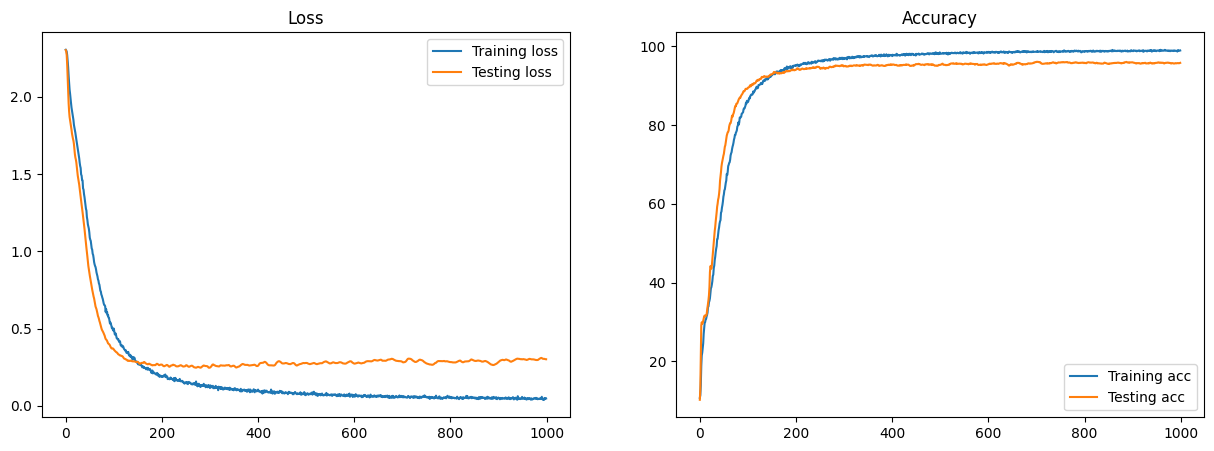

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_history, label="Training loss")
plt.plot(range(epochs), test_loss_history, label="Testing loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_history, label="Training acc")
plt.plot(range(epochs), test_acc_history, label="Testing acc")
plt.legend()
plt.title("Accuracy")

plt.show()

In [14]:
torch.save(obj=model_0.state_dict(), f="./my_pytorch_model.pth")